In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
def calculate_RSI(data, window=14):
    # 計算每日收益
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)

    # 計算平均收益和平均損失
    avg_gain = gain.rolling(window=window, min_periods=1).mean() #min_periods: 計算所需的最小期間
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss # 計算RS
    rsi = 100 - (100 / (1 + rs)) # 計算RSI

    return rsi

In [3]:
# 獲取歷史股價數據
symbol = 'AAPL'
data = yf.download(symbol, start='2020-01-01', end='2023-01-01')

# 計算RSI
data['RSI'] = calculate_RSI(data, window=14)

print(data[['Close', 'RSI']].head())


[*********************100%%**********************]  1 of 1 completed
                Close        RSI
Date                            
2020-01-02  75.087502        NaN
2020-01-03  74.357498   0.000000
2020-01-06  74.949997  44.801348
2020-01-07  74.597504  35.373158
2020-01-08  75.797501  62.347843


In [24]:
delta = data['Close'].diff()
delta

Date
2020-01-02         NaN
2020-01-03   -0.730003
2020-01-06    0.592499
2020-01-07   -0.352493
2020-01-08    1.199997
                ...   
2022-12-23   -0.369995
2022-12-27   -1.830002
2022-12-28   -3.989998
2022-12-29    3.570000
2022-12-30    0.319992
Name: Close, Length: 756, dtype: float64

In [28]:
gain = (delta.where(delta > 0, 0)).fillna(0)
gain

Date
2020-01-02    0.000000
2020-01-03    0.000000
2020-01-06    0.592499
2020-01-07    0.000000
2020-01-08    1.199997
                ...   
2022-12-23    0.000000
2022-12-27    0.000000
2022-12-28    0.000000
2022-12-29    3.570000
2022-12-30    0.319992
Name: Close, Length: 756, dtype: float64

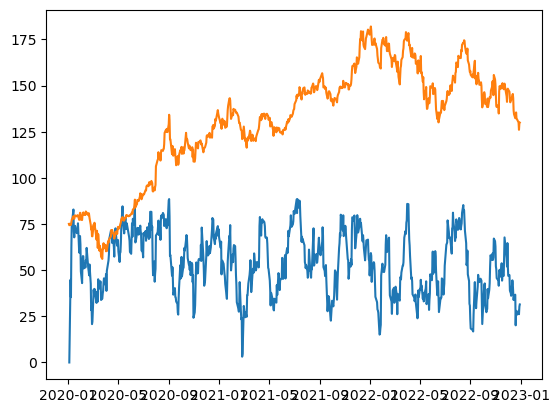

In [21]:
plt.plot(data.index, data["RSI"])
plt.plot(data.index, data["Close"])
plt.show()